PROJECT | Natural Language Processing Challenge

1- Importing Libraries

In [1]:
# Importing basic libraries
import pandas as pd         # For data manipulation (like Excel)
import numpy as np          # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns       # For nicer-looking graphs

# Importing libraries for text processing
import nltk                 # For natural language processing (text cleaning)
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text into numbers
from sklearn.linear_model import LogisticRegression   # Machine learning model
from sklearn.metrics import accuracy_score, classification_report  # To check model performance


2- Load and check the data

In [ ]:
# Reads the CSV file using "\" as separator
df = pd.read_csv("./datasets/training_data_lowercase.csv", sep='\t', engine='python', names=['label', 'title'])

# Show first few rows of the dataframe
print(df.head())

print('-'*20)

# Check shape of the dataframe
print(df.shape)

print('-'*20)

# Check column names
print(df.columns)

print('-'*20)

# Check for missing values
print(df.isnull().sum())


   label                                              title
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...
--------------------
(34152, 2)
--------------------
Index(['label', 'title'], dtype='object')
--------------------
label    0
title    0
dtype: int64


3- Cleaning the text

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

import re                    # Regular expressions to clean text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Create a function to clean text
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize (split the sentence into words)
    words = text.split()

    # 4. Remove stopwords (common words that don't add meaning)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 5. Lemmatize words (reduce them to their root form)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # 6. Join words back into one string
    return ' '.join(words)

# Apply the cleaning function to the title column
df['clean_title'] = df['title'].apply(clean_text)

# Show before and after examples
print(df[['title', 'clean_title']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dudam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dudam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               title  \
0  donald trump sends out embarrassing new year‚s...   
1  drunk bragging trump staffer started russian c...   
2  sheriff david clarke becomes an internet joke ...   
3  trump is so obsessed he even has obama‚s name ...   
4  pope francis just called out donald trump duri...   

                                         clean_title  
0  donald trump sends embarrassing new year eve m...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes internet joke thr...  
3  trump obsessed even obamas name coded website ...  
4  pope francis called donald trump christmas speech  


4- Fit and transform the clean text into numerical vectors (TF-IDF)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Create TF-IDF vectorizer (you can limit the number of features if needed)
vectorizer = TfidfVectorizer(max_features=10000)  # None = no limit on features

# Fit the vectorizer to your cleaned titles
X = vectorizer.fit_transform(df['clean_title'])

# Get all the words (features) and their IDF scores
idf_values = vectorizer.idf_
words = vectorizer.get_feature_names_out()

# Create a DataFrame to organize words and their IDF scores
tfidf_df = pd.DataFrame({
    'word': words,
    'idf': idf_values
})

# Sort to find most and least important words
most_important = tfidf_df.sort_values(by='idf', ascending=False).head(10)
least_important = tfidf_df.sort_values(by='idf', ascending=True).head(10)

print(most_important)
print('-------------------')
print(least_important)


            word        idf
3051         emp  10.745459
2762       donut  10.745459
6665         poo  10.745459
1636   cominghes  10.745459
8000     shapiro  10.745459
2888     dweller  10.339993
28        abrams  10.339993
1597  collective  10.339993
2939     editing  10.339993
9959       yield  10.339993
-------------------
            word       idf
9316       trump  2.048447
9621       video  2.834318
7761         say  3.460638
6116       obama  3.905447
4346       house  3.958177
7439  republican  3.976391
4235     hillary  4.151045
1520     clinton  4.163433
9802       white  4.233713
6022         new  4.298153


5- Split the data (train - test)

In [6]:
from sklearn.model_selection import train_test_split

y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,            # the TF-IDF matrix (numerical features)
    y,            # the labels (0 = fake, 1 = real)
    test_size=0.2,   # 20% of the data will be used for testing
    random_state=42, # ensures reproducibility (same split every time)
    stratify=y       # keeps the proportion of 0s and 1s balanced
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (27321, 10000)
Testing data shape: (6831, 10000)


6-Traing the model 

    Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)  # max_iter avoids convergence warnings

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy = % de acertos
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# Detailed performance by class
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.93

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



In [9]:
# Accuracy on training data
train_accuracy = model.score(X_train, y_train)

# Accuracy on testing data
test_accuracy = model.score(X_test, y_test)

print(f"🏋️‍♂️ Treino: {train_accuracy:.2f}")
print(f"🧪 Teste: {test_accuracy:.2f}")


🏋️‍♂️ Treino: 0.95
🧪 Teste: 0.93


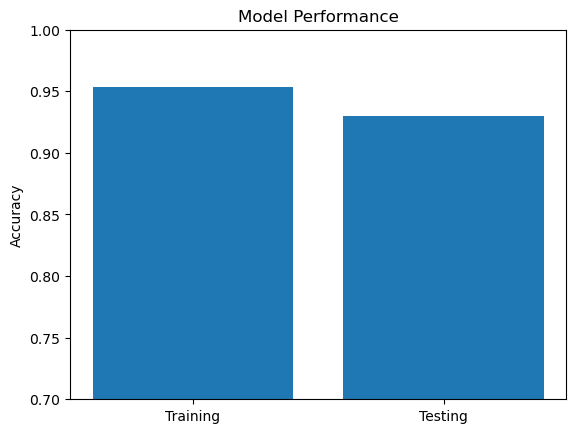

In [10]:
import matplotlib.pyplot as plt

labels = ['Training', 'Testing']
scores = [train_accuracy, test_accuracy]

plt.bar(labels, scores)
plt.ylim(0.7, 1)
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.show()


Naive Bayes Model

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create the model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"✅ Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Detailed performance report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_nb))


✅ Naive Bayes Accuracy: 0.93

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3515
           1       0.93      0.92      0.92      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=500,   # number of trees
    random_state=42,    # ensures reproducibility
    max_depth=50,         # limita a profundidade das árvores
    min_samples_split=20,  # exige mais dados pra criar divisões
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {accuracy_rf:.2f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_rf))


✅ Random Forest Accuracy: 0.90

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3515
           1       0.89      0.91      0.90      3316

    accuracy                           0.90      6831
   macro avg       0.90      0.90      0.90      6831
weighted avg       0.90      0.90      0.90      6831



In [24]:
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print(f"🏋️‍♂️ Treino: {train_acc:.2f}")
print(f"🧪 Teste: {test_acc:.2f}")


🏋️‍♂️ Treino: 0.94
🧪 Teste: 0.90


7 